Click **Kernel > Restart & Run All**.

In [1]:
%matplotlib inline
from query.datasets.prelude import *
from query.datasets.tvnews.validation import *

In [2]:
# start: 3164, end: 4281 in 15 min


# TODO: get distribution of shot length for M vs. F

base_face = face_validation('All faces', lambda x: x)
big_face = face_validation(
    'Faces height > 0.2', lambda qs: qs.annotate(height=F('bbox_y2') - F('bbox_y1')).filter(height__gte=0.2))
fg_face = face_validation(
    'Faces in foreground', lambda qs: qs.filter(background=False))

== All faces ==
# labels: 4507
Precision: 0.991, recall: 0.841

== Faces height > 0.2 ==
# labels: 2332
Precision: 0.986, recall: 0.968

== Faces in foreground ==
# labels: 3215
Precision: 0.760, recall: 0.904



== All gender ==
# labels: 3789
Accuracy: 0.811
Total distribution:
{u'F': '0.315', u'M': '0.680', u'U': '0.005'}
Missed distribution:
{u'F': '0.390', u'M': '0.595', u'U': '0.015'}

Normalized confusion matrix
[[ 0.79223301  0.06252427  0.14524272]
 [ 0.04435146  0.85355649  0.10209205]
 [ 0.05263158  0.26315789  0.68421053]]


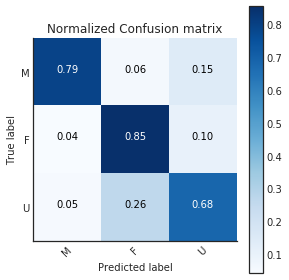

In [3]:
all_gender_accuracy, all_gender_cmat = gender_validation('All gender', base_face)

== Gender w/ faces in foreground ==
# labels: 2906
Accuracy: 0.853
Total distribution:
{u'F': '0.297', u'M': '0.699', u'U': '0.004'}
Missed distribution:
{u'F': '0.346', u'M': '0.625', u'U': '0.029'}

Normalized confusion matrix
[[ 0.83891626  0.04334975  0.11773399]
 [ 0.03240741  0.8900463   0.0775463 ]
 [ 0.08333333  0.25        0.66666667]]


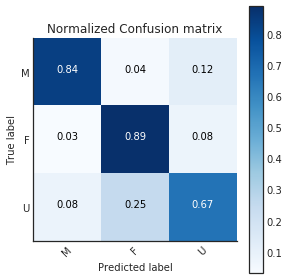

In [4]:
fg_gender_accuracy, fg_gender_cmat = gender_validation('Gender w/ faces in foreground', fg_face)

== Gender w/ face height > 0.2 ==
# labels: 2258
Accuracy: 0.861
Total distribution:
{u'F': '0.295', u'M': '0.701', u'U': '0.004'}
Missed distribution:
{u'F': '0.311', u'M': '0.676', u'U': '0.014'}

Normalized confusion matrix
[[ 0.85208597  0.03855879  0.10935525]
 [ 0.04347826  0.88305847  0.07346327]
 [ 0.          0.22222222  0.77777778]]


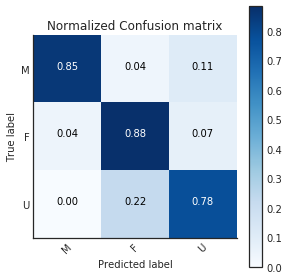

In [5]:
big_gender_accuracy, big_gender_cmat = gender_validation('Gender w/ face height > 0.2', big_face)

In [8]:
import query.datasets.tvnews.validation
reload(query.datasets.tvnews.validation)
from query.datasets.tvnews.validation import *

screentime_validation('All faces', lambda x: x, all_gender_cmat)
screentime_validation('Foreground faces', lambda qs: qs.filter(face__background=False), fg_gender_cmat)
screentime_validation(
    'Face height > 0.2',
    lambda qs: qs.annotate(height=F('face__bbox_y2') - F('face__bbox_y1')).filter(height__gte=0.2),
    big_gender_cmat)

[[2040  161  374]
 [  53 1020  122]
 [   1    5   13]]
0.135750421585
0.00421585160202
0.974212034384
== All faces ==
                                          F            M       M/F           U
level_1     level_0                                                           
multicount  handlabeled-gender  1474.000000  3003.000000  2.037313   30.000000
            rudecarnie          1197.000000  2104.000000  1.757728  521.000000
            rudecarnie-adj      1207.589703  2595.052664  2.148952   19.357633
singlecount handlabeled-gender   836.000000  1372.000000  1.641148   27.000000
            rudecarnie           794.000000  1239.000000  1.560453  397.000000
            rudecarnie-adj       809.381584  1606.539850  1.984898   14.078566

[[1703   88  239]
 [  28  769   67]
 [   1    3    8]]
0.102325581395
0.00348837209302
0.983256351039
== Foreground faces ==
                                          F            M       M/F           U
level_1     level_0                          